In [39]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl
import scipy as sp
import scipy.linalg as spl
import matplotlib.pyplot as plt
from math import cos, pi

## Esame di Metodi Numerici 6 Maggio 2024 

## Esercizo 1
- Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``'test_14_09_2023.mat'``.  Risolvere il sistema confrontando almeno due tra i metodi  visti  per utilizzare per risolvere il sistema lineare con tale matrice dei coefficienti. Confrontare i risultati dei vari metodi, e giustificare i loro comportamento utilizzando i risultati teorici visti a lezione.
                                       [10 punti]
                                         


m=400, n=400
Percentuale elementi diversi da zero 1.2449999999999999
Matrice simmetrica True
Definita positiva True


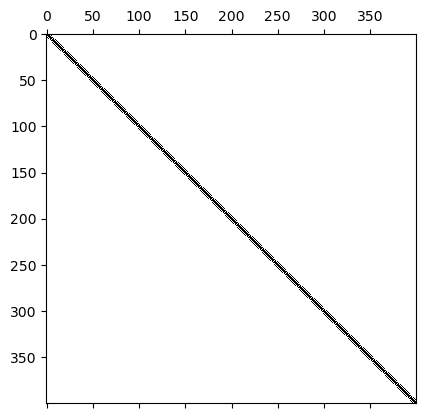

In [30]:
dati = loadmat('test_06_05_2024.mat')
A: np.matrix = dati["A"]
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

# matrice quadrata
n,m = A.shape
print(f"m={m}, n={n}")

# densa se il suo numero di elementi diverso da 0 > del 33%
nz = np.count_nonzero(A) / (n*m)
print("Percentuale elementi diversi da zero", nz * 100)

# visualizzazione matrice
plt.spy(A)

# simmetrica
simmetrica = np.all(A == A.T)
print("Matrice simmetrica", simmetrica)

# definita positiva, tutti autovalori reali e positivi
# sono reali perchè la matrice è simmetrica
# altro modo è il metodo di sylvester
autovalori = npl.eigvals(A)
def_pos = np.all(autovalori > 0)
print("Definita positiva", def_pos)

# implementare almeno due metodi e confronta i risultati

In [35]:
def steepestdescent(A, b, x0, itmax, tol):
	n,m=A.shape
	if n!=m:
		print("Matrice non quadrata")
		return [],[]
	
   	# inizializzare le variabili necessarie
	x = x0
	# calcolo residuo
	r = A@x-b
	# la prima direzione è -r
	p = -r
	it = 0
	
	# voglio che il valore calcolato Ax - b sia il più vicino possibile al valore esatto
	nb = np.linalg.norm(b, 2)
	errore = np.linalg.norm(r, 2) / nb
	
	vec_sol = [x]
	vet_r = [errore]
	 
	# utilizzare il metodo del gradiente per trovare la soluzione
	while it < itmax and errore >= tol:
		it += 1
		
		# ricalcolo alfa = <r, p> / <Ap, p>
		Ap = A @ p
		alpha = - (r.T @ p) / (p.T @ Ap)
	   
	   	# ricalcolo la solzione x = x + alfa * p   
		x = x + alpha * p
		vec_sol.append(x)
		
		# ricalcolo la direzione
		r = r + alpha * Ap
		p = -r
	
		errore=np.linalg.norm(r) / nb
		vet_r.append(errore)
	 
	return x,vet_r,vec_sol,it


def conjugate_gradient(A,b,x0,itmax,tol):
	n,m=A.shape
	if n!=m:
		print("Matrice non quadrata")
		return [],[]
	
	
	# inizializzare le variabili necessarie
	x = x0
	
	r = A@x-b
	p = -r
	it = 0
	
	nb=np.linalg.norm(b)
	errore=np.linalg.norm(r)/nb
	
	vec_sol=[x0]
	vet_r=[errore]
	
	# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
	while errore >= tol and it < itmax:
		it=it+1
		Ap= A @ p

		# alpha <r, p> / <Ap, p>
		alpha = -(r.T @ p) / (p.T @ Ap)
		x = x + alpha * p
		vec_sol.append(x)
		
		rtr_old = r.T @ r
		r = r + alpha * Ap
		gamma = (r.T @ r) / rtr_old 
		p = -r + gamma * p
		
		errore = np.linalg.norm(r) / nb
		vet_r.append(errore)
   
	
	return x,vet_r,vec_sol,it

Iterazioni steepestdesc: 74
Iterazioni steepestdesc: 27


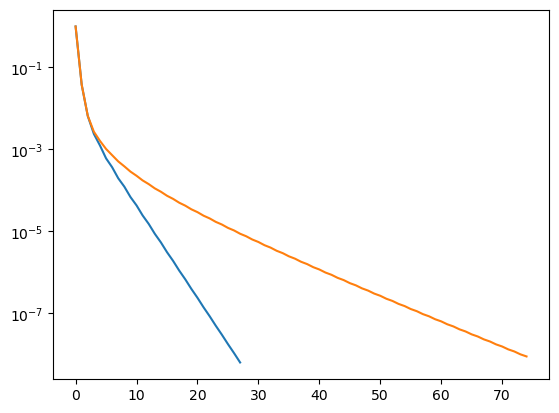

In [33]:
x0 = np.zeros_like(b)
it_max = 1000
tol = 1e-8
x_steep, err_steep, sol_steep, it_steep = steepestdescent(A, b, x0, it_max, tol)
print("Iterazioni steepestdesc:", it_steep)

x_conj, err_conj, sol_conj, it_conj = conjugate_gradient(A, b, x0, it_max, tol)
print("Iterazioni steepestdesc:", it_conj)

# grafico avanzamento per iterazione
plt.semilogy(np.arange(it_conj + 1), err_conj, np.arange(it_steep + 1), err_steep)

Si nota come il metodo del gradiente coniugato arriva alla soluzione in un numero minore di iterazione grazie alla scelta sua scelta della direzione p:
- nel metodo del gradiente la direzione è scelta come l'antigradiente del sistema associato (ovvero meno il residuo r), per ogni iterazione sucessiva però la direzione risulterà ortogonale a quella precedente, il che crea un movimento a "zig-zag".
- nel metodo del gradiente coniugato invece la direzione è scelta ... 

- Data la matrice 
$$A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],$$
Richiamare le ipotesi sotto cui esiste la fattorizzazione di Gauss senza pivoting e scrivere un codice per  verificarle.

                                                [2 punti]

In [ ]:
# ipotesi che A abbia tutti i determinanti dei minori principali di testa < 0

# mal condizionata se condizionamento > 10^4
# rappresenta il fattore amplificativo di piccoli errori su dati che si riflettono sulla soluzione

## Esercizio 2
Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange, $n=5,10,15,18$

- nodi $x_i$, punti equidistanti in un intervallo $[a, b]$,
- nodi $x_i$, zeri dei polinomi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ della funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. 
- $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

                                        [6] punti

In [40]:
def plagr(xnodi,j):
   """
   Restituisce i coefficienti del j-esimo pol di
   Lagrange associato ai punti del vettore xnodi
   """
   xzeri = np.zeros_like(xnodi)
   n = xnodi.size
   if j==0:
      xzeri = xnodi[1:n]
   else:
      xzeri = np.append(xnodi[:j], xnodi[j+1:])

   num = np.poly(xzeri) 
   den = np.polyval(num, xnodi[j])

   p=num/den

   return p

In [57]:
n = 5
a = -1
b = 1
xi = lambda i: (a + b) / 2 + (b - a) / 2 * cos((2*i + 1)*pi / (2*(n + 1)))
f = lambda x: 1 / (1 + 25 * x**2)

interval = np.linspace(a, b, n+1)
x = np.array([xi(i) for i in interval])
print(x)
y = np.array([f(xi) for xi in x])
print(y)

[0.96592583 0.99862953 0.98768834 0.93358043 0.83867057 0.70710678]
[0.04110943 0.0385631  0.03938837 0.04388022 0.05380913 0.07407407]



- Calcolare l'errore di interpolazione $r(x) =  f(x)-pe(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $pe(x)$ calcolato a partire da nodi equdisitanti.
                                        [1] punto
                                        
Visualizzare il grafico di $f(x)$ e $pe(x)$, ed il grafico di $|r(x)|$ per ogni valore $n=5,10,15,18$ 

                                        [1] punto
                                        
Calcolare l'errore di interpolazione $r(x) =  f(x)-pc(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$ calcolato a partire da nodi di Chebichev.

                                      [1] punto
                                            
Visualizzare il grafico di $f(x)$ e $pc(x)$, ed il grafico di $|r(x)|$. 

                                       [1] punto

Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$? Scrivere la formula dell'errore che si compie quando al posto della funzione che ha generato i dati si considera il polinomio interpolatore di grado n e commentarla.
                                         
                                         [3 punti]

In [37]:
# E(x) = 1/(n+1)| * w_n+1(x) * f^(n+1)(esp)
# w_n+1 = (x-x0)(x-x1)...(x-xn)

**Domanda AI**

- Descrivere gli elementi caratterizzanti di un MultiLayer Perceptron (MLP).( Com'è fatto un neurone artificiale, a caso servono le funzioni di attivazione, come sono organizzati i neuroni. Varie tipologie di reti MLP)  ed accennare in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**

- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 1**  
 - Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**
- Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**
 - Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**
 
 **Totale:  7**